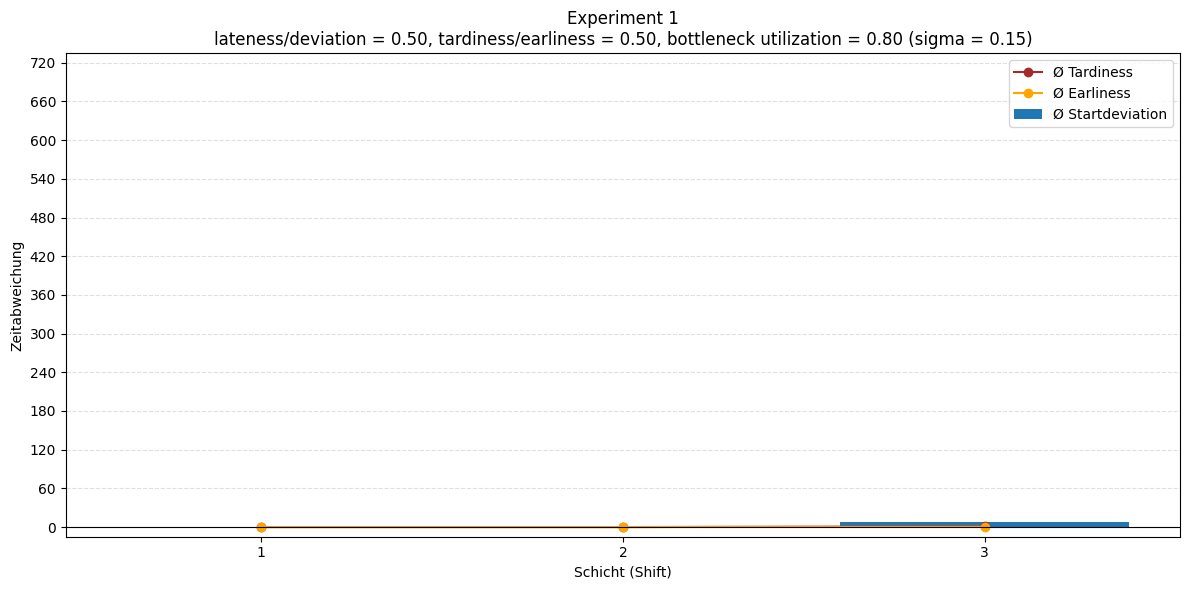

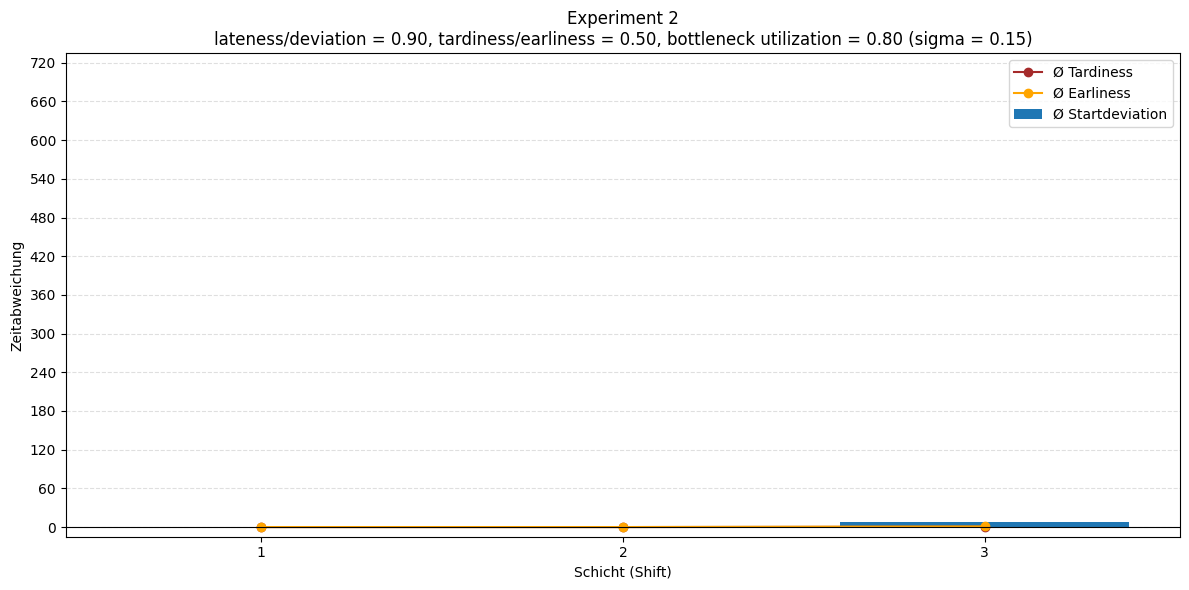

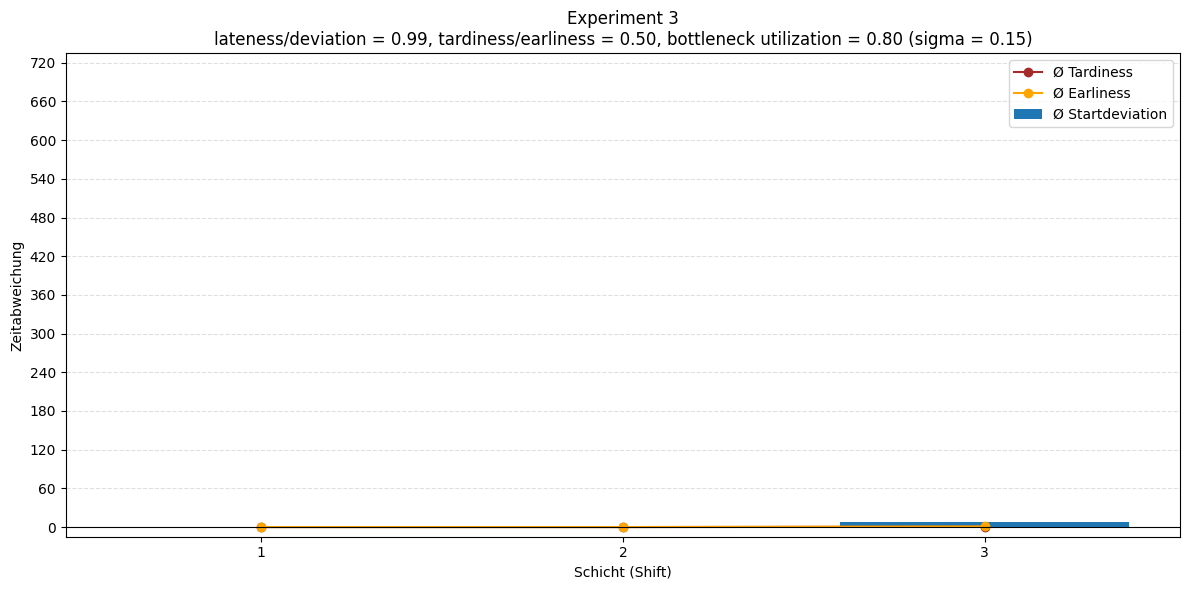

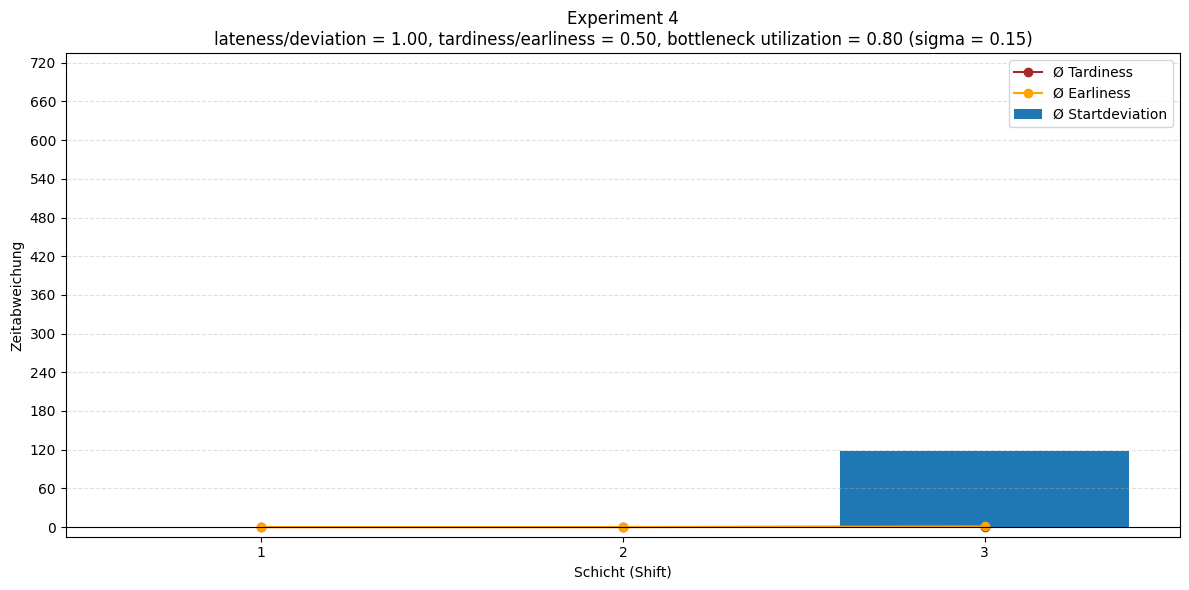

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness
from src.analyses.schedule_jobs_dataframe import mean_start_deviation_per_shift_df, jobs_metrics_from_operations_df

def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )


max_utilization = 0.80

experiments_file_path = f"output/minimalinvasive_experiments_{max_utilization:.2f}".replace(".", "_")


schedules_file_path = f"output/minimalinvasive_schedules_{max_utilization:.2f}".replace(".", "_")

df_experiments = pd.read_csv(f"{experiments_file_path}.csv")

df_schedules = pd.read_csv(f"{schedules_file_path}.csv")

df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_dev = mean_start_deviation_per_shift_df(df_schedules)

experiment_ids = df_experiments["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max=720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()
